# Part II - Ford GoBike riding throughout February 2019
## by Julien Roquelaure

## Investigation Overview


In this investigation, I wanted to understand how customers used the bike sharing service Ford GoBike, 
in the San Francisco Bay Area, during the month of February 2019.


## Dataset Overview

The dataset consists of 183,412 bike rides.

We had information about:
- the ride: duration, start and end time.
- the stations: id, name, and coordinates of the start and end stations.
- the bike id.
- the user: Consumer/Subscriber, gender, birth year, and whether they bike share for all their trip.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime 

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# data wrangling
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['mid_time'] = df['start_time'] + (df['end_time'] - df['start_time'])/2
earth_radius = 6371
def distance(lat1, lon1, lat2, lon2):
    p = math.pi/180
    a = 0.5 - math.cos((lat2-lat1)*p)/2 + math.cos(lat1*p) * math.cos(lat2*p) * (1-math.cos((lon2-lon1)*p))/2
    return 12742 * math.asin(math.sqrt(a))
df['distance'] = df.apply(lambda x: distance(x['start_station_latitude'], x['start_station_longitude'], 
                                             x['end_station_latitude'], x['end_station_longitude']), axis=1)
df['duration_min'] = df['duration_sec'] / 60
df['age'] = 2019 - df['member_birth_year']
df['mid_time_hour'] = df['mid_time'].apply(lambda x: x.hour)
df['mid_time_dayofweek'] = df['mid_time'].apply(lambda x: x.dayofweek)
df['duration_min_log'] = df['duration_min'].apply(np.log10)
df['distance_log'] = df['distance'].apply(np.log10)




## Distribution of bike ride durations

We see that the average bike trip is quite short, with an average of 9 minutes, 
and most rides lasting less than 20 minutes.

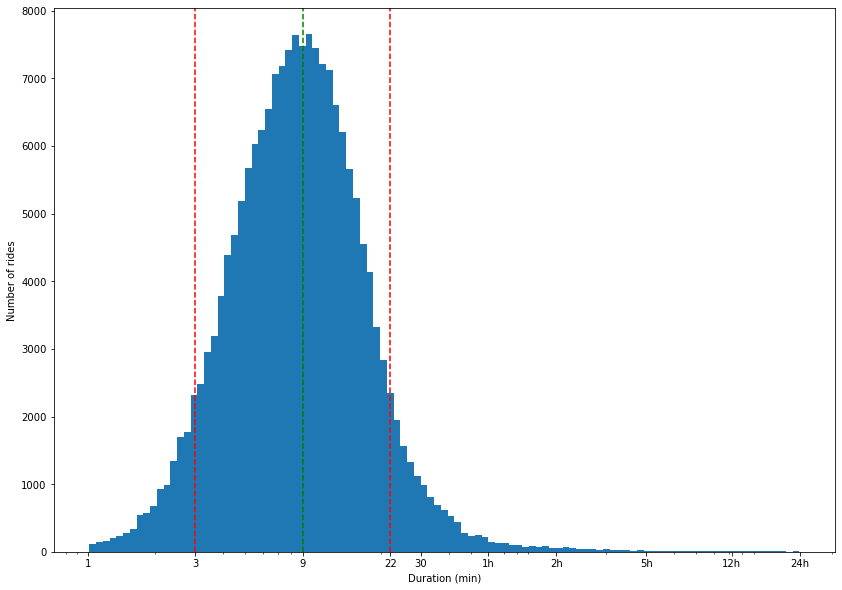

In [4]:
binsize=.03
bins= 10 ** np.arange(np.log10(df.duration_min.min()), np.log10(df.duration_min.max())+binsize, binsize)
plt.figure(figsize=[14,10])
plt.xscale('log')
plt.hist(data=df, x='duration_min', bins=bins)
plt.xticks([1, 3, 9, 22, 30, 60, 120, 300, 720, 1440], 
           [1, 3, 9, 22, 30, '1h', '2h', '5h', '12h', '24h'])
plt.axvline(x=3, color='r', linestyle='dashed')
plt.axvline(x=22, color='r', linestyle='dashed')
plt.axvline(x=9, color='g', linestyle='dashed')
plt.xlabel('Duration (min)')
plt.ylabel('Number of rides')


plt.show()

## A typical week of bike sharing

In a typical week, we have a bimodal distribution: 
Customers use bikes to commute to and from work.

On week ends, we see a normally shaped distribution, center around the beginnig of the afternoon.

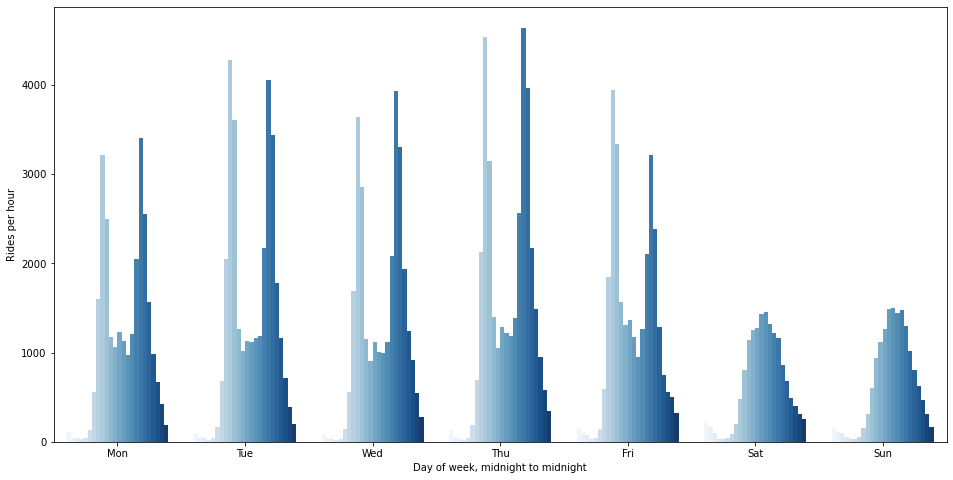

In [5]:
plt.figure(figsize = [16, 8])

sns.countplot(data=df, x='mid_time_dayofweek', hue='mid_time_hour', palette='Blues')
plt.legend().remove()
plt.xticks(np.arange(7), labels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.xlabel("Day of week, midnight to midnight")
plt.ylabel("Rides per hour")

plt.show()

## February 2019 statistics

In the month of February 2019, we see our usual pattern of peak bide riding during the work week,
and less rides on the weekends, with some interesting exceptions:
- Weather-related: Rain on Wed 13/2 and light rain on Mon 2/4, Tue 2/26, and Wed 2/27.
- A holiday: Presidents' Day fell on Mon 18/2.

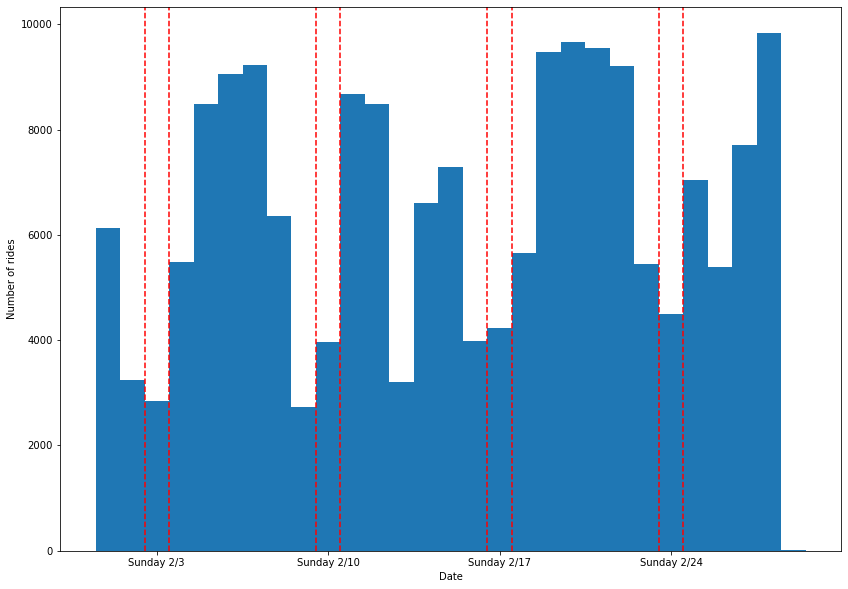

In [6]:
date_min = df['mid_time'].min().date()
date_max = df['mid_time'].max().date()
bins = pd.date_range(start=date_min, end=date_max+pd.Timedelta(days=1))

ticks = []
labels = []

plt.figure(figsize=[14, 10])
plt.hist(data=df, x='mid_time', bins = bins)

for i in bins:
    if i.dayofweek == 6:
        ticks.append(i+pd.Timedelta(days=.5))
        labels.append("Sunday {}/{}".format(i.month, i.day))
        plt.axvline(x=i, color='r', linestyle='dashed')
        plt.axvline(x=i+pd.Timedelta(days=1), color='r', linestyle='dashed')

plt.xticks(ticks, labels)
plt.ylabel('Number of rides')
plt.xlabel('Date')
plt.show()

In [7]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 633577 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\julien.roquelaure\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\julien.roquelaure\Anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\julien.roquelaure\Anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\julien.roquelaure\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\julien.roquelaure\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
